# Extract Images
### This notebook extracts the images from raw roi file and saves them under the IFCB 'FileName(DYYYYMMDDTHHMMSS_IFCBno)' for each sample  

In [ ]:
#you will need a Python 3.10.12 environment to upload pyifcb package ,it doesnt work with new versions
pip install git+https://github.com/joefutrelle/pyifcb

### Lets extract the first image from one .roi file

In [39]:
import ifcb
PATHNAME="D:/EndSeason-DataDump22/DY22_06_IFCB/D20220511T062203_IFCB165.roi"

In [42]:
#open_raw reads the roi files as sampe_bin then turn into array then it filter the array of first image
with ifcb.open_raw(PATHNAME) as sample_bin:
    first = sample_bin.images.keys()[0]
    image = sample_bin.images[first]

In [47]:
import matplotlib.pyplot as plt

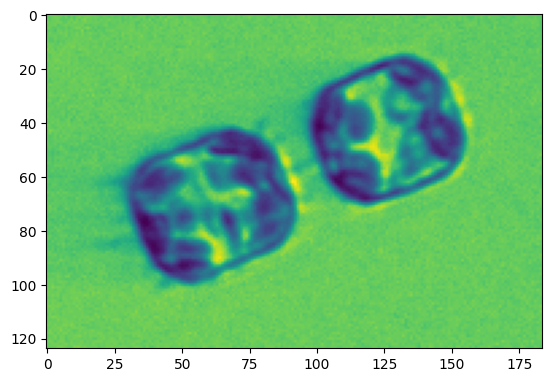

In [48]:
# with matplotlib you can convert array and plot it
plt.imshow(image)

### Lets extract all the images from one sample_bin (.roi) file and save them as .png in a new folder with the filename (DyearmonthdayTtime)
I will use Pillow package

In [ ]:
pip install Pillow

### The below code is designed to extract images from one sample_bin (.roi) file which includes thousands of images

In [37]:
#Extract the desired part of the .roi filename to use as the folder name.
#Construct the new folder path within your specified directory.
#Create the new folder if it doesn't already exist.
#Save all the PNG files into this new folder, following FileName.
from PIL import Image
import os

# Assuming ifcb is a module you have access to that provides the open_raw method 
import ifcb

PATHNAME = 'D:/EndSeason-DataDump22/DY22_06_IFCB/D20220511T062203_IFCB165.roi'

# Use the filename without the extension as the folder name
folder_name = os.path.splitext(os.path.basename(PATHNAME))[0]

# Construct the path for the new folder
new_folder_path = os.path.join('D:/EndSeason-DataDump22/DY22_06_IFCB/images_2022/D202205', folder_name)

# Create the new folder if it doesn't exist
os.makedirs(new_folder_path, exist_ok=True)

# Open the raw file to access the image data
with ifcb.open_raw(PATHNAME) as sample_bin:
    # Iterate over each image in sample_bin.images
    for index, (image_name, image_data) in enumerate(sample_bin.images.items(), start=1):  # Starting from 2 for .00002
        # Convert the image data to a PIL Image object
        img = Image.fromarray(image_data)
        
        # Format the filename with the incremented part, starting from .00002
        filename = f"{folder_name}.{index:05}.png"
        
        # Construct the full path for the output file within the new folder
        output_path = os.path.join(new_folder_path, filename)
        
        # Save the image
        img.save(output_path)


        



### Now lets iterate this to other .roi files in the folder but limit with one day of measurements.
Because if we extract all the files with the same code memory of computer cannot handle it

In [38]:
#List all .roi files in the target directory.
#Filter the files to only include those within your specified start and end filenames (D20220511T064547_IFCB165.roi to D20220511T234541_IFCB165.roi).
#For each filtered .roi file, repeat the process of opening the file, converting images to PNG, and saving them to a new folder named after the .roi file.

import os
from PIL import Image
import glob

# Assuming ifcb is a module you have access to that provides the open_raw method
# import ifcb

# Path to the directory containing the .roi files
directory_path = 'D:/EndSeason-DataDump22/DY22_06_IFCB'

# Start and end filenames for the desired date range
start_file = 'D20220511T064547_IFCB165.roi'
end_file = 'D20220511T234541_IFCB165.roi'

# Find all .roi files in the directory
all_roi_files = glob.glob(os.path.join(directory_path, '*.roi'))

# Filter the list for files within the specified range
filtered_roi_files = [file for file in all_roi_files if start_file <= os.path.basename(file) <= end_file]

# Iterate over each filtered .roi file
for roi_file in filtered_roi_files:
    # Extract the base filename without the extension to use as the folder name
    base_filename = os.path.splitext(os.path.basename(roi_file))[0]
    
    # Construct the path for the new folder
    new_folder_path = os.path.join('D:/EndSeason-DataDump22/DY22_06_IFCB/images_2022/D202205', base_filename)

    # Create the new folder if it doesn't exist
    os.makedirs(new_folder_path, exist_ok=True)
    
    # Open the .roi file to access the image data
    with ifcb.open_raw(roi_file) as sample_bin:
        # Iterate over each image in sample_bin.images
        for index, (image_name, image_data) in enumerate(sample_bin.images.items(), start=2):
            # Convert the image data to a PIL Image object
            img = Image.fromarray(image_data)
            
            # Format the filename with the incremented part, starting from .00002
            filename = f"{base_filename}.{index:05}.png"
            
            # Construct the full path for the output file within the new folder
            output_path = os.path.join(new_folder_path, filename)
            
            # Save the image
            img.save(output_path)
